![](images/llmcam_yolo.png)

This scenario demonstrates how our built-in tools integrate **computer vision** with GPT Function Calling (GPT FC) in a practical use case.

In this demo, a user wants to test different vision models and visualize their outputs through plotting. Without our application, this process would require manually setting up and configuring each model - a complex and time-consuming task involving technical expertise, compatibility handling, and workflow replication across different systems or teams.

With our application, this workflow is streamlined. Users can specify tasks in plain language, and GPT FC automatically handles model setup, selection, and execution. Additionally, GPT FC supports real-time interactions, flexible machine learning pipelines, and dynamic tool integration, allowing seamless adaptation to evolving needs.

For this demo, we will analyze the YouTube Live feed from Santa Claus Village: https://www.youtube.com/watch?v=Cp4RRAEgpeU.

## Importing built-in `llmcam.vision` modules

For this demo, we will add some default built-in tools from `llmcam.vision`. At this step, the main steps are:

- Import `llmcam.core` modules and `llmcam.vision` modules.  
- Set up initial `tools` list and add built-in tools from `llmcam.vision`.  
- Verify set up with GPT messages.  

In [1]:
# Import all the base modules and vision modules
from llmcam.core.fc import *
from llmcam.core.fn_to_schema import *
from llmcam.vision.ytlive import *
from llmcam.vision.gpt4v import *
from llmcam.vision.yolo import *
from llmcam.vision.plotting import *

In [2]:
# Define the `tools` list with default built-in functions
tools = [function_schema(func, "llmcam_vision") for func in [
    capture_youtube_live_frame, 
    ask_gpt4v_about_image_file,
    detect_objects,
    plot_object
]]

In [3]:
# Start the conversation and verify the tools
messages = form_msgs([
    ("system", "You are a helpful system administrator. Use the supplied tools to help the user."),
    ("user", "What tools can you use?")
])
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
I can use the following tools:  1. **Capture YouTube Live Frame**: This tool captures a JPEG image
from a YouTube Live stream and returns the path to the saved image.  2. **Ask GPT-4V About Image
File**: This tool provides quantitative information about a given image file, such as a city or
satellite image.  3. **Detect Objects**: This tool detects objects in an image using the YOLO model.
4. **Plot Object**: This tool generates a bar plot displaying the number of instances of a specified
object detected in a list of images. You can specify to use either the GPT or YOLO method for the
extraction.  Additionally, I can execute multiple tools in parallel if needed. Let me know if you
need more information or if you would like to use any of these tools!


## Testing different vision models

Our built-in tools contain 2 models - YOLO object detection and GPT model. Both these tools only need the image as their inputs. This image can be retrieved from the Youtube Live with another built-in tool. 

At this step, the main tasks include:

- Capture an image from Santa Clause Village with its link: https://www.youtube.com/watch?v=Cp4RRAEgpeU  
- Use GPT model to detect the number of people and basic information.  
- Use YOLO to detect the number of people and any other objects. 

In [4]:
# Capture the live feed from Santa Claus Village
messages.append(form_msg(
    "user", 
    "Here is the live feed for Santa Claus Village https://www.youtube.com/watch?v=Cp4RRAEgpeU to capture. \
Tell me also the file path of the saved image."
))
complete(messages, tools=tools)
print_msg(messages[-1])

[youtube] Extracting URL: https://www.youtube.com/watch?v=Cp4RRAEgpeU
[youtube] Cp4RRAEgpeU: Downloading webpage
[youtube] Cp4RRAEgpeU: Downloading ios player API JSON
[youtube] Cp4RRAEgpeU: Downloading tv player API JSON
[youtube] Cp4RRAEgpeU: Downloading m3u8 information
>> Assistant:
The live image from Santa Claus Village has been captured successfully. The file path of the saved
image is:  `/home/nghivo/tinyMLaaS/llmcam/data/cap_2025.02.12_09:48:30_Santa Claus Village.jpg`


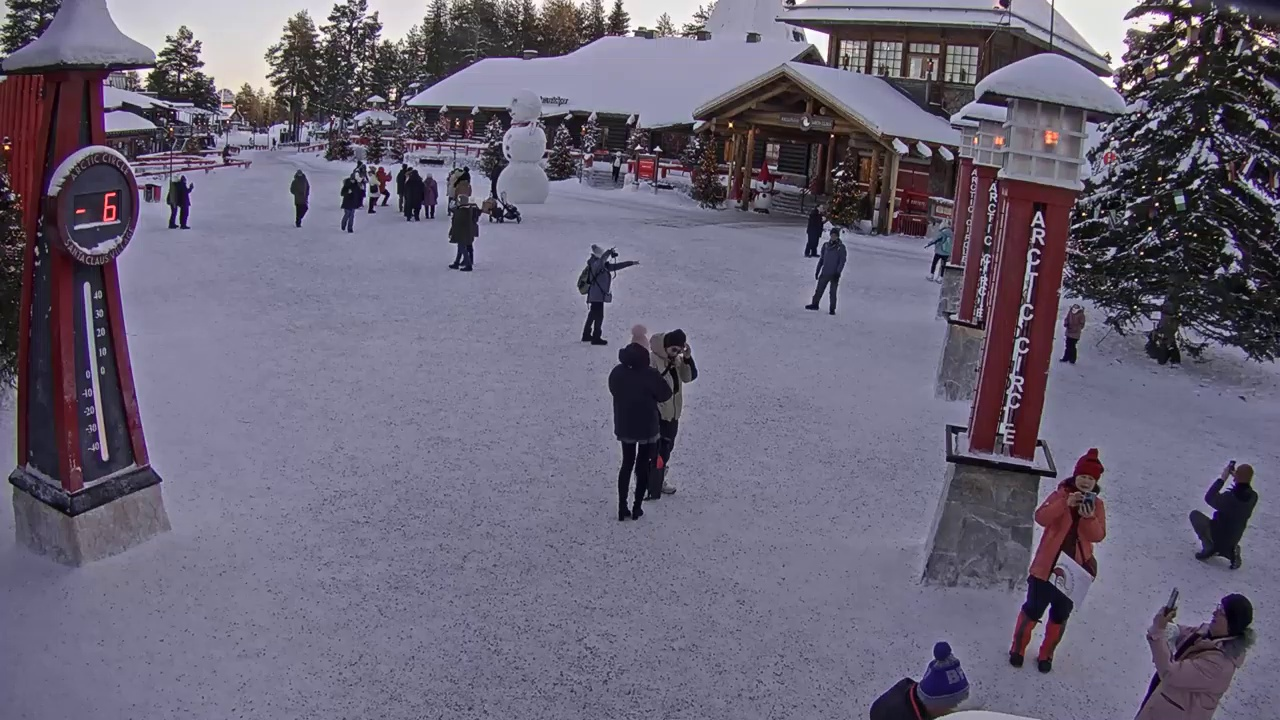

In [13]:
# Display the captured image
from IPython.display import Image
Image("/home/nghivo/tinyMLaaS/llmcam/data/cap_2025.02.12_09:48:30_Santa Claus Village.jpg")

In [6]:
# Ask the GPT-4 Vision model about the image
messages.append(form_msg(
    "user", 
    "Use the GPT-4 Vision model to tell the number of people and briefly describe the image."
))
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
The analysis of the captured image from Santa Claus Village is as follows:  - **Number of People**:
15 - **Description**:   - **Timestamp**: 2023-10-06T10:00:00Z   - **Location**: Santa Claus Village,
Rovaniemi   - **Image Dimensions**: 1280x720   - **Buildings**: 3, with a height range of 1-2
stories   - **Vehicles**: No cars, trucks, or boats present   - **Available Parking Spaces**: 0   -
**Street Lights**: 4   - **Time of Day**: Afternoon   - **Artificial Lighting**: Medium level   -
**Visibility**: Clear   - **Sky Visibility**: Yes, with clear sky light conditions   - **Water
Bodies Visible**: None  If you need further information or analysis, feel free to ask!


In [7]:
# Detect the objects in the image using YOLO
messages.append(form_msg(
    "user",
    "Use YOLO to detect the number of people in the image and any other objects \
in the image."
))
complete(messages, tools=tools)
print_msg(messages[-1])


image 1/1 /home/nghivo/tinyMLaaS/llmcam/data/cap_2025.02.12_09:48:30_Santa Claus Village.jpg: 384x640 17 persons, 53.3ms
Speed: 5.8ms preprocess, 53.3ms inference, 276.8ms postprocess per image at shape (1, 3, 384, 640)
>> Assistant:
Using the YOLO model, the detection results in the image from Santa Claus Village are as follows:  -
**Number of People**: 17  No other objects were detected in the image using the YOLO model. If you
need any more analyses or information, let me know!


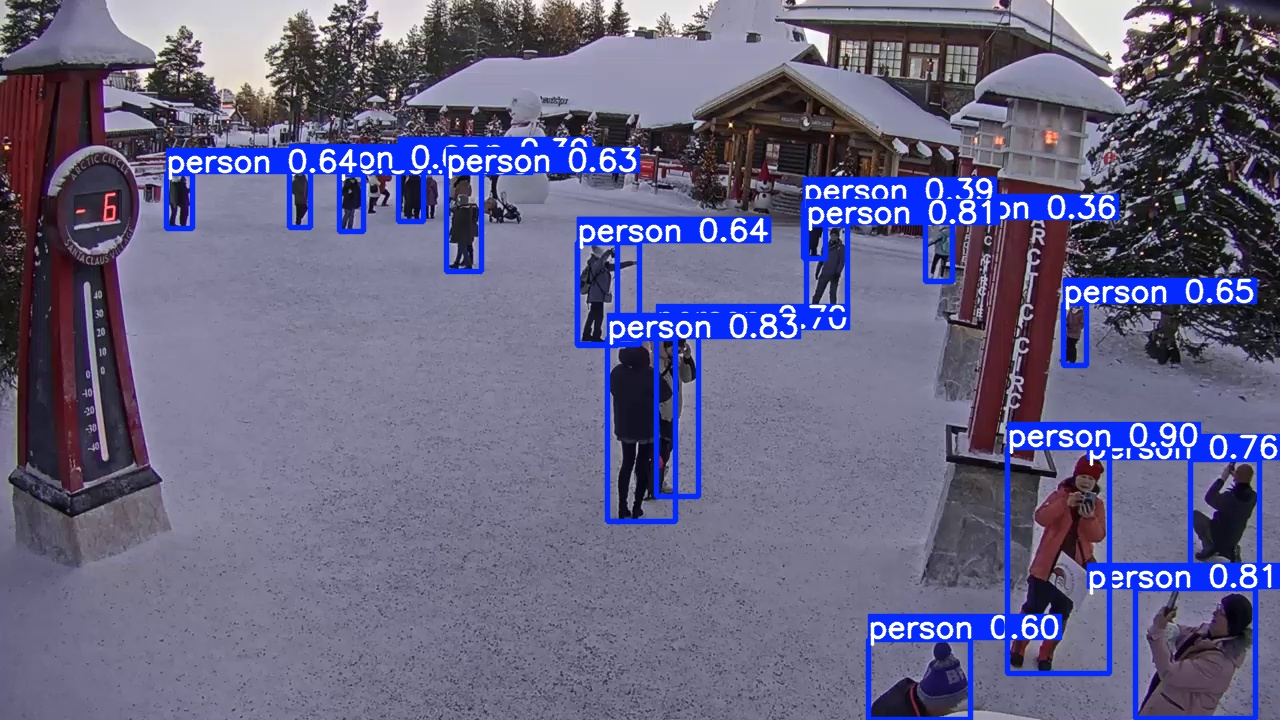

In [14]:
# Display the detection image
Image("/home/nghivo/tinyMLaaS/llmcam/data/detection_cap_2025.02.12_09:48:30_Santa Claus Village.jpg")

## Extending pipeline with plots

One of the key strengths of GPT Function Calling (GPT FC) is its ability to quickly adapt to new requirements and modify pipelines on the fly. In this demo, we demonstrate this flexibility by extending our workflow with visualization tools. Instead of manually configuring a new analysis step, we simply add a new tool from `llmcam.vision.plotting`, and continue the conversation by comparing two vision models.

At this step, the main tasks include:

- Capture another image to increase data volume in plots.  
- Plot the number of people with both models.

This dynamic adaptability ensures that users can refine their workflows in real time, making adjustments as needed without complex reconfiguration.

In [9]:
# Capture another image from the live feed
messages.append(form_msg(
    "user", 
    "Capture another image from the live feed."
))
complete(messages, tools=tools)
print_msg(messages[-1])

[youtube] Extracting URL: https://www.youtube.com/watch?v=Cp4RRAEgpeU
[youtube] Cp4RRAEgpeU: Downloading webpage
[youtube] Cp4RRAEgpeU: Downloading ios player API JSON
[youtube] Cp4RRAEgpeU: Downloading tv player API JSON
[youtube] Cp4RRAEgpeU: Downloading m3u8 information
>> Assistant:
Another image from the Santa Claus Village live feed has been captured successfully. The file path
of the saved image is:  `/home/nghivo/tinyMLaaS/llmcam/data/cap_2025.02.12_09:48:51_Santa Claus
Village.jpg`  If you need further analysis on this new image or anything else, feel free to ask!


In [10]:
# Plot the number of people in the captured images using both GPT-4 Vision and YOLO
messages.append(form_msg(
    "user",
    "Plot the number of people in these captured images using both methods \
 - GPT retrieval of basic information and YOLO object detection. \
Tell me the file path of the generated plot."
))
complete(messages, tools=tools)
print_msg(messages[-1])


image 1/1 /home/nghivo/tinyMLaaS/llmcam/data/cap_2025.02.12_09:48:30_Santa Claus Village.jpg: 384x640 17 persons, 27.9ms
Speed: 1.9ms preprocess, 27.9ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/nghivo/tinyMLaaS/llmcam/data/cap_2025.02.12_09:48:51_Santa Claus Village.jpg: 384x640 20 persons, 27.8ms
Speed: 1.9ms preprocess, 27.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
>> Assistant:
The plot showing the number of people detected in the captured images using both methods (GPT
retrieval and YOLO object detection) has been generated. The file path of the plot is:
`/home/nghivo/tinyMLaaS/llmcam/data/728_object_count_plot.jpg`  If you need further assistance or
analysis, feel free to let me know!


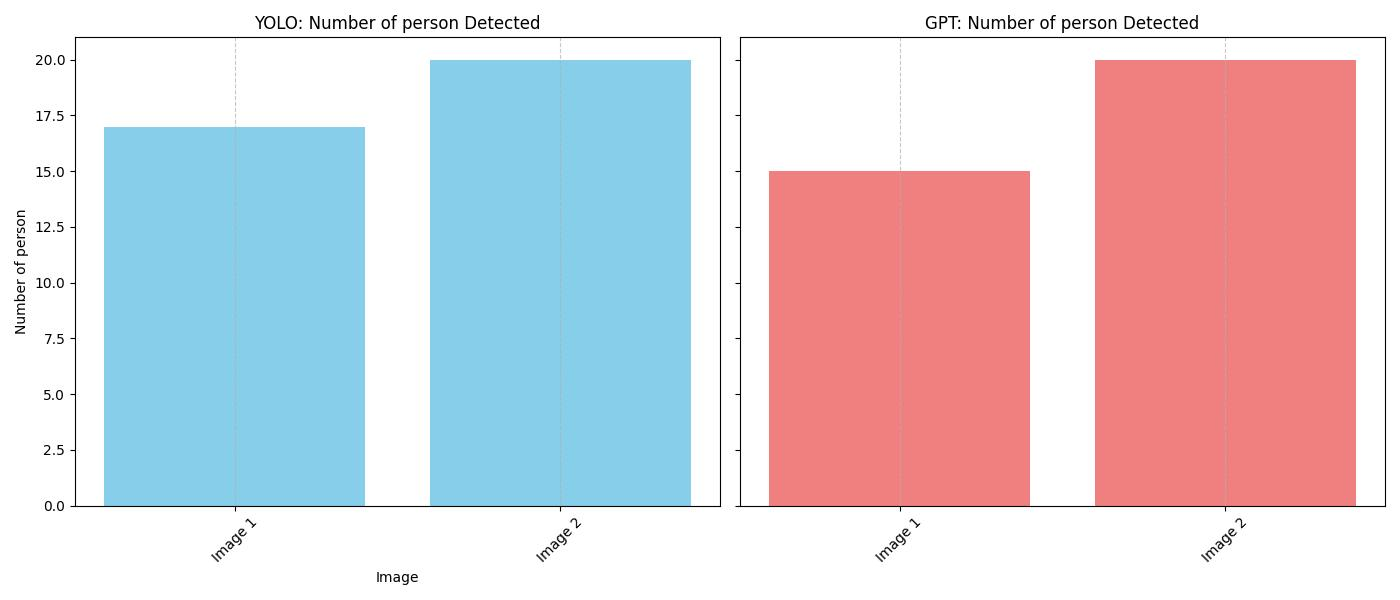

In [15]:
# Display plot
Image("/home/nghivo/tinyMLaaS/llmcam/data/728_object_count_plot.jpg")

## TRANSCRIPT

In [16]:
print_msgs(messages)

>> System:
You are a helpful system administrator. Use the supplied tools to help the user.
>> User:
What tools can you use?
>> Assistant:
I can use the following tools:  1. **Capture YouTube Live Frame**: This tool captures a JPEG image
from a YouTube Live stream and returns the path to the saved image.  2. **Ask GPT-4V About Image
File**: This tool provides quantitative information about a given image file, such as a city or
satellite image.  3. **Detect Objects**: This tool detects objects in an image using the YOLO model.
4. **Plot Object**: This tool generates a bar plot displaying the number of instances of a specified
object detected in a list of images. You can specify to use either the GPT or YOLO method for the
extraction.  Additionally, I can execute multiple tools in parallel if needed. Let me know if you
need more information or if you would like to use any of these tools!
>> User:
Here is the live feed for Santa Claus Village https://www.youtube.com/watch?v=Cp4RRAEgpeU to